In [2]:
import pandas as pd
import seaborn as sea
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

tf.set_random_seed(123)    

In [3]:
dataSet = pd.read_csv('C:/Users/Antonio/Documents/GitHub/evaluacion-Lirb/Diabetes/diabetes.csv',
                       na_values='*', comment='\t',sep=',',skipinitialspace=True)
copy_DS = dataSet.copy()

def normalize():
   
    for i in copy_DS.columns:
        copy_DS[i] = (copy_DS[i]- copy_DS[i].mean())/(copy_DS[i].std())
    return 0
normalize()
copy_DS.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.461580e-17,-1.029845e-16,2.109926e-17,5.676706e-17,-1.607563e-17,-5.525997e-17,-1.406617e-17,9.570022e-17,3.880757e-17,1.303005e-17,-1.065010e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.251738e+00,-9.374744e-01,-1.895781e+00,-2.360392e+00,-2.662394e+00,-2.427874e+00,-2.148448e+00,-1.604285e+00,-2.648045e+00,-2.893112e+00,-1.649092e+00
25%,-7.832846e-01,-9.374744e-01,-7.188104e-01,-7.697854e-01,-7.192046e-01,-6.375263e-01,-7.374604e-01,-8.293610e-01,-6.982245e-01,-6.967595e-01,-8.448689e-01
50%,1.130443e-01,-9.374744e-01,-1.529591e-01,-1.190828e-01,-9.073818e-02,-8.020037e-02,-1.382738e-01,-5.443750e-02,-4.090032e-02,-2.263165e-02,-1.509019e-01
75%,7.995940e-01,1.064282e+00,6.562083e-01,7.485206e-01,5.955183e-01,6.267323e-01,6.155415e-01,7.204860e-01,6.810977e-01,5.862581e-01,7.700636e-01
max,2.325260e+00,1.064282e+00,3.581660e+00,2.772929e+00,3.232188e+00,4.174548e+00,3.804760e+00,3.889923e+00,2.805579e+00,2.847848e+00,2.514710e+00


In [4]:
copy_DS.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.799594,1.064282,1.295620,0.459319,-0.928693,-0.731236,-0.911418,-0.054438,0.418077,-0.370569,-0.014703
1,-0.039522,-0.937474,-1.080955,-0.552885,-0.177423,-0.402430,1.562643,-0.829361,-1.434925,-1.936285,-1.000525
2,1.791277,1.064282,0.933475,-0.119083,-0.957588,-0.718084,-0.679475,-0.054438,0.060139,-0.544537,-0.144416
3,-1.870322,-0.937474,-0.243495,-0.769785,0.256002,0.524802,-0.756789,0.720486,0.476532,-0.196600,0.698721
4,0.113044,-0.937474,-0.764079,0.459319,0.082632,0.327519,0.170984,-0.054438,-0.671820,-0.979458,-0.222244


In [5]:
copy_DS.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


{'whiskers': [<matplotlib.lines.Line2D at 0x12af2a8e710>,
 'caps': [<matplotlib.lines.Line2D at 0x12af2e2ce80>,
 'boxes': [<matplotlib.lines.Line2D at 0x12af2e2c6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x12af2e357b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x12af2e35b00>],
 'means': []}

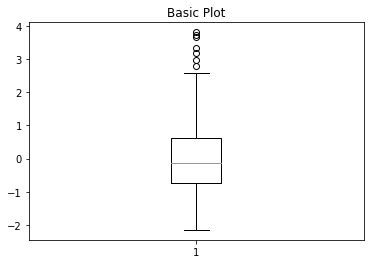

In [14]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(copy_DS['s3'])

In [90]:
dataset_train = copy_DS.sample(frac=0.75,random_state=0)
train_y = dataset_train['Y']
dataset_train.drop(columns='Y', inplace=True)

dataset_test = copy_DS.drop(dataset_train.index)
test_y = dataset_test['Y']
dataset_test.drop(columns='Y', inplace=True)




In [201]:
w0 = tf.Variable(tf.zeros(1, dtype=tf.float64))
w1 = tf.Variable(tf.truncated_normal([10, 1], mean=0.0, stddev=1.0, dtype=tf.float64))
learning_rate = 0.1

x = tf.constant(dataset_train)
y = tf.constant(train_y)

def pred(x,y):
    
    prediction = tf.add(w0,tf.matmul(x,w1))
    error = tf.reduce_mean(tf.square(tf.subtract(y, prediction)))
    return [prediction , error]


p,error = pred(x,y)
epochs = 500
points = [[], []]
init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(error)
   

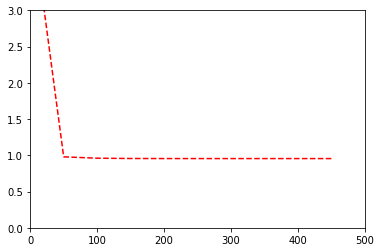

Test error = 1.127103709275801 



In [202]:
with tf.Session() as sess:
    sess.run(init)
    for i in list(range(epochs)):
        sess.run(optimizer)
        if(i % 50 == 0):
            points[0].append(i)
            points[1].append(sess.run(error))
    plt.plot()
    plt.plot(points[0], points[1], 'r--')
    plt.axis([0, epochs, 0, 3])
    plt.show()
    test_error = pred(dataset_test, test_y)[1]
    print('Test error =', sess.run(test_error), '\n')
   

In [203]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(w1),sess.run(w0))

[[ 0.14977081]
 [-0.32075605]
 [-1.20287108]
 [ 0.81949431]
 [ 0.74999543]
 [-0.63253891]
 [ 1.23940368]
 [ 0.8546713 ]
 [ 0.97966803]
 [ 1.35886968]] [0.]


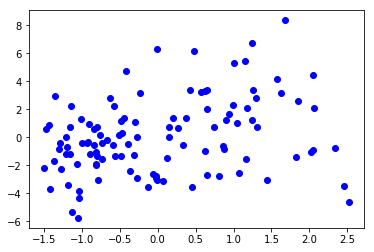

In [204]:
with tf.Session() as sess:
    fitted_values = pred(dataset_test,test_y)[0]
    sess.run(init)
    aux = fitted_values.eval().tolist()
    fitt = [aux[i][0] for i in range(110)]
    true_values = test_y.values.tolist()
    np.reshape(true_values,(110,))
    points[0]=true_values
    points[1]=fitt
    plt.plot(points[0],points[1],'bo')
